In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import List, Tuple
from ca2_analysis import ca2Data, peakAndTroughIndices, ca2Metrics
%matplotlib inline
pd.set_option("display.precision", 2)
pd.set_option("display.expand_frame_repr", False)

In [2]:
def contentsOfDir(dir_path: str, search_terms: List[str]) -> Tuple[List[str], List[Tuple[str]]]:
  if os.path.isdir(dir_path):
    base_dir = dir_path
    for search_term in search_terms:
      glob_search_term = '*' + search_term + '*'
      file_paths = glob.glob(os.path.join(dir_path, glob_search_term))
      if len(file_paths) > 0:
        break
  else:
    # presume it's actually a single file path
    base_dir = os.path.dirname(dir_path)
    file_paths = [dir_path]
  files = []
  for file_path in file_paths:
      file_name, file_extension = os.path.splitext(os.path.basename(file_path))
      files.append((file_name, file_extension))
  return base_dir, files

In [3]:
def plotCa2Signals(
    time_stamps: np.ndarray,
    signal: np.ndarray,
    peak_indices: np.ndarray,
    trough_indices: np.ndarray,
    plot_title: str='',
    plot_smoothed_signal: bool=True
):
    plt.title(plot_title)
    if plot_smoothed_signal:
        plt.plot(time_stamps, signal)
    else:
        plt.scatter(time_stamps, signal, s=2, facecolors='none', edgecolors='g')    
    plt.scatter(time_stamps[peak_indices], signal[peak_indices], s=80, facecolors='none', edgecolors='b')
    plt.scatter(time_stamps[trough_indices], signal[trough_indices], s=80, facecolors='none', edgecolors='r')
    plt.show()

In [4]:
def runTestSuite():
    test_dir, test_files = contentsOfDir(dir_path='../test_data', search_terms=['.xlsx'])
    for file_name, file_extension in test_files:
        time_stamps, input_signal = ca2Data(os.path.join(test_dir, file_name + file_extension))

        peak_indices, trough_indices = peakAndTroughIndices(
            input_signal,
            time_stamps,
            expected_frequency_hz=1.0
        )

        all_metrics = ca2Metrics(
            input_signal,
            time_stamps,
            expected_frequency_hz=1.0
        )
        print()
        print(f'metrics for {file_name}')
        for metrics in all_metrics:
            p2p_order = metrics['p2p_order']
            average_metrics = metrics['mean_metric_data']
            metric_failure_proportions = metrics['metric_failure_proportions']
            print(f'{p2p_order} average metrics (failure %): {average_metrics} ({metric_failure_proportions})')

        plotCa2Signals(
            time_stamps, 
            input_signal,
            peak_indices,
            trough_indices,
            file_name
        )



metrics for 2021-10-11_d17_ENT-001-S1_run4_001_A2_A4
trough_to_peak average metrics (failure %): [0.06253492 0.07686184 0.083     ] ([0. 0. 0.])
peak_to_trough average metrics (failure %): [0.1971412  0.78032297 0.91700006] ([0. 0. 0.])


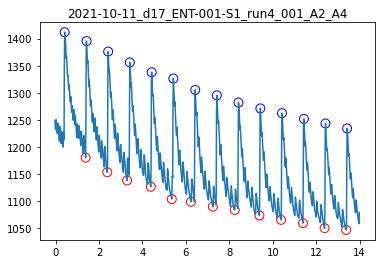


metrics for 2021-10-22_d28_ENT-001-S1_run4_001_A1_A2
trough_to_peak average metrics (failure %): [0.01672265 0.03099665 0.03876926] ([0. 0. 0.])
peak_to_trough average metrics (failure %): [0.21252291 0.58560383 0.96023077] ([0. 0. 0.])


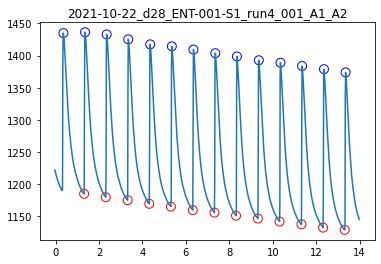


metrics for 2021-10-22_d28_ENT-001-S1_run4_001_A4_A6
trough_to_peak average metrics (failure %): [0.04934459 0.06301532 0.06899998] ([0. 0. 0.])
peak_to_trough average metrics (failure %): [0.20363787 0.61247027 0.93323076] ([0. 0. 0.])


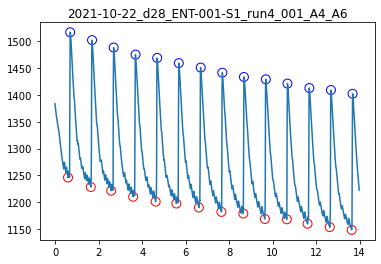


metrics for 2021-10-22_d28_ENT-001-S1_run4_002_A1_A2
trough_to_peak average metrics (failure %): [0.01771729 0.033724   0.05307147] ([0. 0. 0.])
peak_to_trough average metrics (failure %): [0.23750755 0.60751265 0.94615376] ([0. 0. 0.])


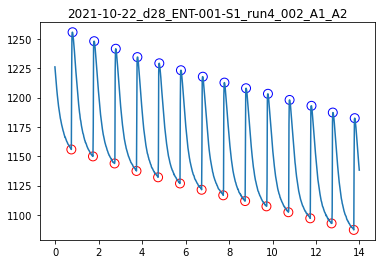


metrics for 2021-10-22_d28_ENT-001-S1_run4_002_A4_A6
trough_to_peak average metrics (failure %): [0.02023884 0.03791276 0.05607155] ([0. 0. 0.])
peak_to_trough average metrics (failure %): [0.23929428 0.61218655 0.94292295] ([0. 0. 0.])


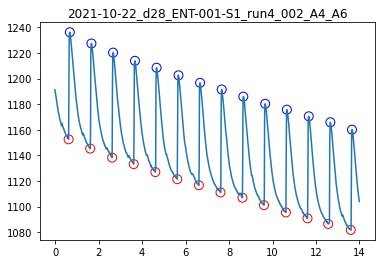


metrics for 2021-10-29_d35_ENT-001-S1_run4_001_A1
trough_to_peak average metrics (failure %): [0.0630734  0.07656709 0.08199985] ([0. 0. 0.])
peak_to_trough average metrics (failure %): [0.20770372 0.65847075 0.9182309 ] ([0. 0. 0.])


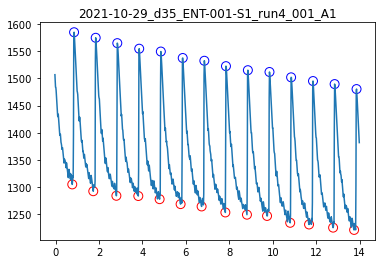


metrics for 2021-10-29_d35_ENT-001-S1_run4_001_A2
trough_to_peak average metrics (failure %): [0.01775952 0.03124462 0.03776925] ([0. 0. 0.])
peak_to_trough average metrics (failure %): [0.2358338  0.6370296  0.96230763] ([0. 0. 0.])


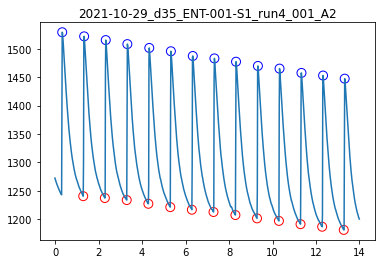


metrics for 2021-10-29_d35_ENT-001-S1_run4_001_A4
trough_to_peak average metrics (failure %): [0.06296702 0.07591471 0.08200001] ([0. 0. 0.])
peak_to_trough average metrics (failure %): [0.21257493 0.7331245  0.9180769 ] ([0. 0. 0.])


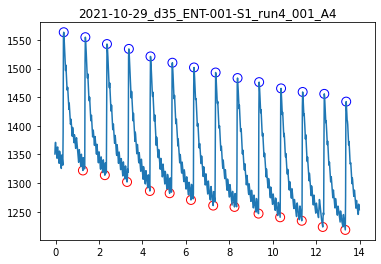


metrics for 2021-10-29_d35_ENT-001-S1_run4_001_A6
trough_to_peak average metrics (failure %): [0.06543862 0.07809956 0.08292306] ([0. 0. 0.])
peak_to_trough average metrics (failure %): [0.19700287 0.6167401  0.9171539 ] ([0. 0. 0.])


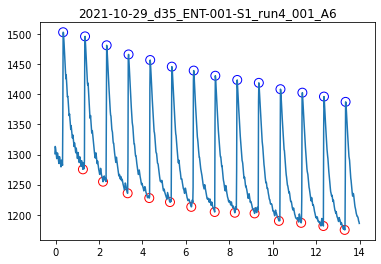


metrics for 2021-10-29_d35_ENT-001-S1_run4_002_A1
trough_to_peak average metrics (failure %): [0.01967692 0.03514586 0.05169224] ([0. 0. 0.])
peak_to_trough average metrics (failure %): [0.27978513 0.6931839  0.9473077 ] ([0. 0. 0.])


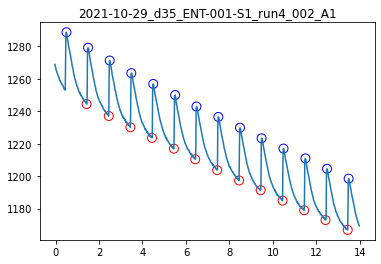


metrics for 2021-10-29_d35_ENT-001-S1_run4_002_A2_20ms
trough_to_peak average metrics (failure %): [0.02167849 0.04361315 0.06333338] ([0. 0. 0.])
peak_to_trough average metrics (failure %): [0.250064   0.6674444  0.93611115] ([0. 0. 0.])


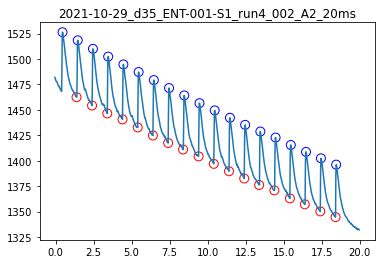


metrics for 2021-10-29_d35_ENT-001-S1_run4_002_A2
trough_to_peak average metrics (failure %): [0.02482172 0.04291465 0.06246154] ([0. 0. 0.])
peak_to_trough average metrics (failure %): [0.26569265 0.66815144 0.9364615 ] ([0. 0. 0.])


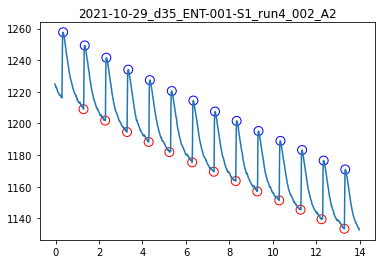


metrics for 2021-10-29_d35_ENT-001-S1_run4_002_A4
trough_to_peak average metrics (failure %): [0.04154981 0.06054873 0.07538462] ([0. 0. 0.])
peak_to_trough average metrics (failure %): [0.26129088 0.6974607  0.9246153 ] ([0. 0. 0.])


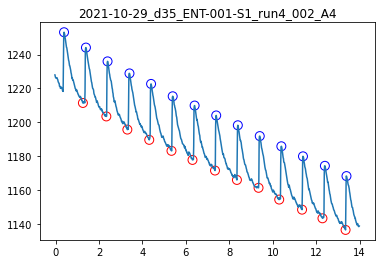


metrics for 2021-10-29_d35_ENT-001-S1_run4_002_A6
trough_to_peak average metrics (failure %): [0.02160115 0.03826909 0.05492318] ([0. 0. 0.])
peak_to_trough average metrics (failure %): [0.26442835 0.67749125 0.9450769 ] ([0. 0. 0.])


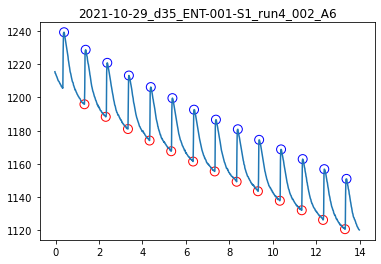

In [5]:
runTestSuite()